# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [35]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [5]:
# number of callbacks for black-sounding names
sum(data[data.race=='b'].call)

157.0

In [44]:
sum(data.call)
#data.info()
print(data)

     id   ad  education  ofjobs  yearsexp  honors  volunteer  military  \
0     b    1          4       2         6       0          0         0   
1     b    1          3       3         6       0          1         1   
2     b    1          4       1         6       0          0         0   
3     b    1          3       4         6       0          1         0   
4     b    1          3       3        22       0          0         0   
5     b    1          4       2         6       1          0         0   
6     b    1          4       2         5       0          1         0   
7     b    1          3       4        21       0          1         0   
8     b    1          4       3         3       0          0         0   
9     b    1          4       2         6       0          1         0   
10    b    1          4       4         8       0          1         0   
11    b    1          4       4         8       0          0         0   
12    b    1          4       4       

In [13]:
data_b = data[data['race']=='b']
#print(data_b.info())

In [15]:
data_w = data[data['race']=='w']
#print(data_w.info())

In [33]:
x=[]

for _ in range(120):
    y=np.random.choice(data['call'],size=40)
    x.append(np.mean(y))
print(x)
print(np.mean(x))
print(np.median(x))

[0.125, 0.075000003, 0.075000003, 0.15000001, 0.125, 0.025, 0.050000001, 0.050000001, 0.075000003, 0.050000001, 0.075000003, 0.1, 0.050000001, 0.125, 0.075000003, 0.125, 0.025, 0.075000003, 0.125, 0.025, 0.15000001, 0.025, 0.050000001, 0.075000003, 0.075000003, 0.025, 0.075000003, 0.15000001, 0.125, 0.15000001, 0.175, 0.075000003, 0.050000001, 0.075000003, 0.0, 0.075000003, 0.050000001, 0.075000003, 0.2, 0.1, 0.075000003, 0.1, 0.125, 0.075000003, 0.125, 0.075000003, 0.050000001, 0.075000003, 0.15000001, 0.1, 0.075000003, 0.025, 0.025, 0.175, 0.1, 0.075000003, 0.1, 0.125, 0.125, 0.025, 0.1, 0.050000001, 0.1, 0.1, 0.1, 0.075000003, 0.075000003, 0.125, 0.1, 0.025, 0.1, 0.125, 0.125, 0.050000001, 0.025, 0.1, 0.15000001, 0.1, 0.075000003, 0.125, 0.1, 0.1, 0.1, 0.1, 0.15000001, 0.1, 0.125, 0.125, 0.1, 0.1, 0.050000001, 0.1, 0.050000001, 0.1, 0.1, 0.050000001, 0.075000003, 0.125, 0.1, 0.15000001, 0.025, 0.075000003, 0.050000001, 0.050000001, 0.175, 0.075000003, 0.050000001, 0.125, 0.050000001

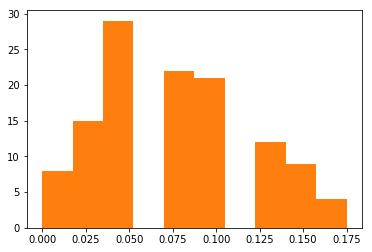

In [31]:
plt.hist(x)
plt.show()

In [36]:
scipy.stats.normaltest(x)

NormaltestResult(statistic=1.7869719033157767, pvalue=0.40922671886885242)

1.1) Given that we do not know the population standard deviation of the call column, the t-test for hypothesis testing should be used. Since we are comparing the sample means of white sounding and black sounding applicant call column, a 2-sample test should be used for hypothesis testing. 

1.2) The central limit theorem is defined as follows: when taking many samples from a population, with adequate sample size, the means of these samples form a normal distribution, irrespective of the population distribution. To check the central limit theorem, 100 samples of the call column are randomly sampled and the means of each sample calculated. Scipy normal test function is applied on this array of means. Null hypothesis of this test is that sample is taken from a normal distribution. Since the p-value is high, we conclude that null hypothesis stands and the sampling means are distributed normally. So, the dataset complies with central limit theorem.

2) Null hypothesis for this dataset is that population means of call variable for white sounding and black sounding job seekers is identical. Alternate hypothesis is that these population means are different from each other.

In [38]:
scipy.stats.ttest_ind(data_b['call'],data_w['call'])

Ttest_indResult(statistic=-4.1147052908617514, pvalue=3.9408021031288859e-05)

3.1) The p-value from the 2 sample t-test between the white sounding and black sounding call variable is calculated as 0.0000394. So, the null hypothesis of this hypothesis test is rejected. If the sampling were done correctly, then the population means of white sounding and black sounding job calls are not identical.

In [43]:
scipy.stats.t.interval(0.95,119,loc=0.087,scale=(np.std(x)/(119**2)))

(0.086994436404160019, 0.087005563595839969)

3.2) Confidence interval cannot be computed for the call column since it is a binary variable. Confidence intervals can only be calculated for continuous variables. So, instead the confidence interval of sampling means were calculated. It is seen that the width between upper and lower bounds of the confidence interval is very small, indicating that the sampling means are tightly distributed. 

4) Based on the given dataset, it is concluded that the expected value of callbacks for white sounding applicants is different from those for black sounding applicants. This assumes that the given dataset was sampled correctly. 

5) Using the hypothesis test, it is difficult to say that race is the largest factor influencing the expected value of callbacks. It is most important that sampling was done correctly. While the sampled dataset has more than 4800 rows, with an equal split between black sounding and white sounding applicants, it is important that other attributes are also similar between white and black sounding applicants. For instance, if the sample had white sounding applicants with better credentials, this may skew our analysis. But if the other attributes are also similar and if the hypothesis test still gives the same result, then it is possible that race has a large influence on callbacks. 

A better way to do this analysis will be to split the data into black sounding and white sounding applicants, perform separate hypothesis tests on the difference in means of all attributes. This will lead to many hypothesis tests. If the difference in means of all these other attributes are not significant, it can be definitely concluded that race has a large influence on callbacks. 

Finally, a logistic regression model, with callbacks as dependent variable, will also be effective at identifying whether race plays a large role in callbacks.